<a href="https://colab.research.google.com/github/Rockuzzer/test/blob/main/Capstone_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOMAIN: Automotive Surveillance.

CONTEXT:
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of
the car, type, colour, number plates etc.

DATA DESCRIPTION:
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.
Data description:

*   Test Images: Consists of real images of cars as per the make and year of the car.
*   Train Images: Consists of real images of cars as per the make and year of the car.
*   Train Annotation: Consists of bounding box region for training images.
*   Test Annotation: Consists of bounding box region for testing images.

Dataset has been attached along with this project. Please use the same for this capstone project.
Original link to the dataset for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder [ for your
reference only ]

Reference: 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE
Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
import os
import zipfile
import pandas as pd
from zipfile import ZipFile
import glob
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mp

Step 1: Import the data.

In [ ]:
# Step 1: Import the data

# Path to the zip files
annotations = "/content/drive/MyDrive/AIML/Capstone Project/Annotations.zip"
car_images = "/content/drive/MyDrive/AIML/Capstone Project/CarImages.zip"

# Directory to extract the data
extracted_dir = "/content/drive/MyDrive/AIML/Capstone Project/extracted_data"

# Function to extract zip files
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extract the annotations
extract_zip(annotations, extracted_dir)

# Extract the car images
extract_zip(car_images, extracted_dir)

# List the contents of the extracted directory
extracted_contents = os.listdir(extracted_dir)
print("Contents of the extracted directory:", extracted_contents)

Contents of the extracted directory: ['Annotations', 'CarImages', '__MACOSX']


Step 2: Map training and testing images to its classes.

In [ ]:
import tensorflow as tf

# Directory paths
train_dir = "/content/drive/MyDrive/AIML/Capstone Project/extracted_data/CarImages/Train Images"
test_dir = "/content/drive/MyDrive/AIML/Capstone Project/extracted_data/CarImages/Test Images"

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
)

# Load validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
)

# Load testing dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
)

Found 8144 files belonging to 196 classes.
Using 6516 files for training.
Found 8144 files belonging to 196 classes.
Using 1628 files for validation.
Found 8041 files belonging to 196 classes.


Step 3: Map training and testing images to its annotations.

In [ ]:
import pandas as pd

# Directory containing annotations
annotations_dir = "/content/drive/MyDrive/AIML/Capstone Project/extracted_data/Annotations"

# Read training annotations CSV
train_annotations_path = os.path.join(annotations_dir, "Train Annotations.csv")
train_annotations_df = pd.read_csv(train_annotations_path)

# Read testing annotations CSV
test_annotations_path = os.path.join(annotations_dir, "Test Annotation.csv")
test_annotations_df = pd.read_csv(test_annotations_path)

# Display the structure of the DataFrames
print("Train Annotations DataFrame:")
print(train_annotations_df.head())

print("\nTest Annotations DataFrame:")
print(test_annotations_df.head())


Train Annotations DataFrame:
  Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        39         116         569         375   
1  00002.jpg                        36         116         868         587   
2  00003.jpg                        85         109         601         381   
3  00004.jpg                       621         393        1484        1096   
4  00005.jpg                        14          36         133          99   

   Image class  
0           14  
1            3  
2           91  
3          134  
4          106  

Test Annotations DataFrame:
  Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        30          52         246         147   
1  00002.jpg                       100          19         576         203   
2  00003.jpg                        51         105         968         659   
3  00004.jpg                        67          84         

‣ Step 4: Display images with bounding box.

In [ ]:
# Print contents of the training directory
print("Contents of the training directory:", os.listdir(train_dir))

Contents of the training directory: ['Dodge Dakota Crew Cab 2010', 'GMC Canyon Extended Cab 2012', 'Hyundai Santa Fe SUV 2012', 'Dodge Durango SUV 2012', 'Chevrolet Silverado 1500 Extended Cab 2012', 'Ford Mustang Convertible 2007', 'Buick Rainier SUV 2007', 'Jeep Compass SUV 2012', 'Chevrolet Silverado 2500HD Regular Cab 2012', 'Ford Edge SUV 2012', 'Dodge Ram Pickup 3500 Quad Cab 2009', 'Bentley Continental Supersports Conv. Convertible 2012', 'Land Rover Range Rover SUV 2012', 'Hyundai Tucson SUV 2012', 'Honda Odyssey Minivan 2007', 'Audi 100 Wagon 1994', 'Dodge Challenger SRT8 2011', 'Mercedes-Benz Sprinter Van 2012', 'Bentley Continental GT Coupe 2012', 'Rolls-Royce Ghost Sedan 2012', 'Lamborghini Gallardo LP 570-4 Superleggera 2012', '.DS_Store', 'Dodge Charger SRT-8 2009', 'Volkswagen Beetle Hatchback 2012', 'Audi TT RS Coupe 2012', 'Acura TSX Sedan 2012', 'Jaguar XK XKR 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Honda Accord Sedan 2012', 'BMW X5 SUV 2007', 'Ford F-150 

In [ ]:
# Print the column names in the annotation DataFrame
print("Annotation DataFrame columns:", train_annotations_df.columns)

Annotation DataFrame columns: Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tensorflow.keras.preprocessing import image

# Function to display image with bounding boxes
def display_image_with_boxes(image_path, annotations_df):
    # Load the image
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)

    # Display the image
    plt.imshow(img_array.astype("uint8"))

    # Plot bounding boxes
    for index, row in annotations_df.iterrows():
        left, top, width, height = row["Unnamed: 2"], row["Unnamed: 3"], row["Unnamed: 4"], row["Bounding Box coordinates"]
        xmin, ymin, xmax, ymax = left, top, left + width, top + height
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor="r", facecolor="none")
        plt.gca().add_patch(rect)

    plt.show()

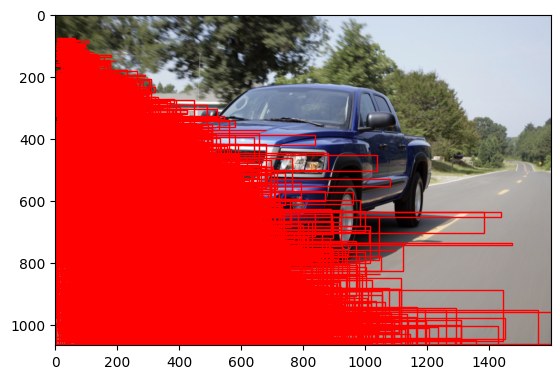

In [ ]:
# Example usage for training image with bounding boxes
train_example_image_path = os.path.join(train_dir, "Dodge Dakota Crew Cab 2010", "00202.jpg")  # Replace with an actual image path
display_image_with_boxes(train_example_image_path, train_annotations_df)